In [1]:
!pip install scikit-learn xgboost catboost lightgbm category_encoders


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pycaret
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, make_scorer
from sklearn.metrics import matthews_corrcoef
from category_encoders import WOEEncoder, BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split, StratifiedKFold, LeaveOneOut, cross_validate
import pickle
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#### Reading in the dataset

In [5]:
ML_data = pd.read_csv("/Users/kassywang/Documents/Summer Project/R/without outliers/Clean_complete_data_by_dipping_catergory.csv")
ML_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   study_id                    699 non-null    object 
 1   ageyrs                      699 non-null    int64  
 2   sex                         699 non-null    int64  
 3   finalhiv                    699 non-null    int64  
 4   artyrs                      699 non-null    float64
 5   fruit                       699 non-null    int64  
 6   veg                         699 non-null    int64  
 7   salt                        699 non-null    int64  
 8   beverage                    699 non-null    int64  
 9   snacks                      699 non-null    int64  
 10  friedfood                   699 non-null    int64  
 11  creatinine                  699 non-null    float64
 12  triglycerides               699 non-null    float64
 13  low-density lipoprotein     699 non

In [6]:
####Checking the columns of the dataset
print(ML_data.columns)

Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'fruit', 'veg',
       'salt', 'beverage', 'snacks', 'friedfood', 'creatinine',
       'triglycerides', 'low-density lipoprotein', 'total cholesterol',
       'high-density lipoprotein', 'eGFR_2021', 'vigorous physical activity',
       'moderate physical activity', 'walking', 'calculated_classification',
       'smoking', 'bmi', 'waist_hip_ratio', 'alcohol_consumption',
       'calculated_dipping_status'],
      dtype='object')


In [7]:
#### Checking the shape of the dataset
print("Shape of the dataset:", ML_data.shape)

Shape of the dataset: (699, 26)


In [8]:
### Get the distribution
dipping_counts = ML_data['calculated_classification'].value_counts()
print("Dipping category distribution:\n", dipping_counts)

Dipping category distribution:
 calculated_classification
1    367
0    257
3     54
2     21
Name: count, dtype: int64


#### **Creating a new column after grouping the Dippers:0 and Extreme:2 to 0 and Non dippers:1 and Reverse dippers:3 to 0**

In [9]:

ML_data['dipping_grouped'] = ML_data['calculated_classification'].apply(
    lambda x: 1 if x in [1, 3] else 0
)

## Check the unique catergories of the dipping_grouped
print(ML_data['dipping_grouped'].unique())

[0 1]


In [12]:
## list the column names
ML_data.columns

Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'fruit', 'veg',
       'salt', 'beverage', 'snacks', 'friedfood', 'creatinine',
       'triglycerides', 'low-density lipoprotein', 'total cholesterol',
       'high-density lipoprotein', 'eGFR_2021', 'vigorous physical activity',
       'moderate physical activity', 'walking', 'calculated_classification',
       'smoking', 'bmi', 'waist_hip_ratio', 'alcohol_consumption',
       'calculated_dipping_status', 'dipping_grouped'],
      dtype='object')

In [13]:
### Delete the study_id and unnamed columms
ML_data = ML_data.drop(columns=['study_id', 'calculated_dipping_status', 'calculated_classification'])
ML_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ageyrs                      699 non-null    int64  
 1   sex                         699 non-null    int64  
 2   finalhiv                    699 non-null    int64  
 3   artyrs                      699 non-null    float64
 4   fruit                       699 non-null    int64  
 5   veg                         699 non-null    int64  
 6   salt                        699 non-null    int64  
 7   beverage                    699 non-null    int64  
 8   snacks                      699 non-null    int64  
 9   friedfood                   699 non-null    int64  
 10  creatinine                  699 non-null    float64
 11  triglycerides               699 non-null    float64
 12  low-density lipoprotein     699 non-null    float64
 13  total cholesterol           699 non

In [14]:
### Create a new dataset called clean_data as a copy of the ML_data
clean_data = ML_data.copy()

In [16]:
## list the column names
clean_data.columns

Index(['ageyrs', 'sex', 'finalhiv', 'artyrs', 'fruit', 'veg', 'salt',
       'beverage', 'snacks', 'friedfood', 'creatinine', 'triglycerides',
       'low-density lipoprotein', 'total cholesterol',
       'high-density lipoprotein', 'eGFR_2021', 'vigorous physical activity',
       'moderate physical activity', 'walking', 'smoking', 'bmi',
       'waist_hip_ratio', 'alcohol_consumption', 'dipping_grouped'],
      dtype='object')

In [17]:
#### Converting columns to correct data types
# Columns to exclude from categorical conversion
exclude_columns = ["ageyrs",'artyrs', 'bmi','hivyrs','waist_hip_ratio', 'creatinine', 'triglycerides', 'low-density lipoprotein',
       'total cholesterol', 'high-density lipoprotein', 'eGFR_2021']

# Select all columns except the ones in exclude_columns
columns_to_convert = clean_data.columns.difference(exclude_columns)

# Convert selected columns to categorical
clean_data[columns_to_convert] = clean_data[columns_to_convert].astype('category')

In [18]:
#### Checking the data types of the columns after conversion
clean_data.dtypes

ageyrs                           int64
sex                           category
finalhiv                      category
artyrs                         float64
fruit                         category
veg                           category
salt                          category
beverage                      category
snacks                        category
friedfood                     category
creatinine                     float64
triglycerides                  float64
low-density lipoprotein        float64
total cholesterol              float64
high-density lipoprotein       float64
eGFR_2021                      float64
vigorous physical activity    category
moderate physical activity    category
walking                       category
smoking                       category
bmi                            float64
waist_hip_ratio                float64
alcohol_consumption           category
dipping_grouped               category
dtype: object

In [19]:
#### Checking for missing values in the dataset
missing_values = clean_data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

Missing values in each column:
 Series([], dtype: int64)


In [20]:
###print the first 5 rows of the dataset
clean_data.head()

,ageyrs,sex,finalhiv,artyrs,fruit,veg,salt,beverage,snacks,friedfood,...,high-density lipoprotein,eGFR_2021,vigorous physical activity,moderate physical activity,walking,smoking,bmi,waist_hip_ratio,alcohol_consumption,dipping_grouped
0,47,0,0,0.0,1,1,0,1,1,1,...,1.5,111.3,0,1,1,0,35.1,0.82,1,0
1,40,0,0,0.0,1,1,1,1,1,1,...,1.0,112.1,1,1,1,0,21.9,0.94,0,1
2,47,0,1,13.0,1,1,1,1,1,1,...,0.8,107.3,1,1,1,0,21.7,0.91,1,1
3,41,1,1,0.0,1,1,1,0,0,1,...,1.4,110.0,0,1,1,0,26.3,0.92,1,0
4,39,1,0,0.0,1,1,1,1,1,1,...,0.6,125.9,1,1,1,0,17.4,0.99,1,0


In [21]:
clean_data.describe().T


,count,mean,std,min,25%,50%,75%,max
ageyrs,699.0,36.570815,12.037980,17.00,25.00,38.00,46.00,76.00
artyrs,699.0,1.679542,5.270372,0.00,0.00,0.00,0.00,98.00
creatinine,699.0,0.826609,0.205390,0.30,0.70,0.80,0.90,3.30
triglycerides,699.0,1.338770,0.770721,0.10,0.80,1.10,1.60,8.60
low-density lipoprotein,699.0,2.446209,0.896936,0.20,1.80,2.40,3.00,6.80
total cholesterol,699.0,4.253505,1.191336,0.10,3.40,4.20,4.90,9.70
high-density lipoprotein,699.0,1.180544,0.392179,0.30,0.90,1.10,1.40,3.90
eGFR_2021,699.0,105.462518,19.245385,21.50,92.65,108.50,120.10,149.90
bmi,699.0,23.938913,13.211905,10.00,20.60,22.40,25.75,354.80
waist_hip_ratio,699.0,0.889256,0.631916,0.47,0.80,0.85,0.89,11.16


In [22]:
## Check the clean data for the row that has value as 98.00 for artyrs and its finalhiv
clean_data[clean_data['artyrs'] == 98.00]

,ageyrs,sex,finalhiv,artyrs,fruit,veg,salt,beverage,snacks,friedfood,...,high-density lipoprotein,eGFR_2021,vigorous physical activity,moderate physical activity,walking,smoking,bmi,waist_hip_ratio,alcohol_consumption,dipping_grouped
404,26,0,0,98.0,1,0,1,1,1,1,...,0.8,149.9,0,1,0,0,27.6,9.7,0,0


In [23]:
### Convert that value to 0 since the finalhiv is 0
clean_data.loc[clean_data['artyrs'] == 98.00, 'artyrs'] = 0
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ageyrs,699.0,36.570815,12.037980,17.00,25.00,38.00,46.00,76.00
artyrs,699.0,1.539342,3.803872,0.00,0.00,0.00,0.00,25.00
creatinine,699.0,0.826609,0.205390,0.30,0.70,0.80,0.90,3.30
triglycerides,699.0,1.338770,0.770721,0.10,0.80,1.10,1.60,8.60
low-density lipoprotein,699.0,2.446209,0.896936,0.20,1.80,2.40,3.00,6.80
total cholesterol,699.0,4.253505,1.191336,0.10,3.40,4.20,4.90,9.70
high-density lipoprotein,699.0,1.180544,0.392179,0.30,0.90,1.10,1.40,3.90
eGFR_2021,699.0,105.462518,19.245385,21.50,92.65,108.50,120.10,149.90
bmi,699.0,23.938913,13.211905,10.00,20.60,22.40,25.75,354.80
waist_hip_ratio,699.0,0.889256,0.631916,0.47,0.80,0.85,0.89,11.16


In [24]:
#### Define the features and target variables
X = clean_data.drop('dipping_grouped', axis=True)
Y = clean_data['dipping_grouped']


In [25]:
X.head(3)

,ageyrs,sex,finalhiv,artyrs,fruit,veg,salt,beverage,snacks,friedfood,...,total cholesterol,high-density lipoprotein,eGFR_2021,vigorous physical activity,moderate physical activity,walking,smoking,bmi,waist_hip_ratio,alcohol_consumption
0,47,0,0,0.0,1,1,0,1,1,1,...,7.1,1.5,111.3,0,1,1,0,35.1,0.82,1
1,40,0,0,0.0,1,1,1,1,1,1,...,3.3,1.0,112.1,1,1,1,0,21.9,0.94,0
2,47,0,1,13.0,1,1,1,1,1,1,...,3.4,0.8,107.3,1,1,1,0,21.7,0.91,1


In [26]:
#### Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

train_dipping_counts = y_train.value_counts()
print("Dipping category distribution in training set:\n", train_dipping_counts)

test_dipping_counts = y_test.value_counts()
print("Dipping category distribution in testing set:\n", test_dipping_counts)

Shape of training set: (559, 23)
Shape of testing set: (140, 23)
Dipping category distribution in training set:
 dipping_grouped
1    337
0    222
Name: count, dtype: int64
Dipping category distribution in testing set:
 dipping_grouped
1    84
0    56
Name: count, dtype: int64


In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

model_knn=KNeighborsClassifier()
model_nb=GaussianNB()
model_mlp = MLPClassifier(random_state=1)
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier()
model_logr =LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0)
model_lgbm = LGBMClassifier(random_state=0, n_jobs = -1)
model_xgb = XGBClassifier(random_state=0)
model_gbc = GradientBoostingClassifier(random_state=0)
model_cat = CatBoostClassifier(verbose=False)
model_dt = DecisionTreeClassifier()
model_et = ExtraTreesClassifier()
model_svm = SVC(probability=True)
model_ada = AdaBoostClassifier(random_state=0)

models = []
models.append(('Logistic regression', model_logr))
models.append(('Suport Vector Machine', model_svm))
models.append(('Decision trees', model_dt))
models.append(('Random Forest', model_rf))
models.append(('Ada Boost', model_ada))
models.append(('Gradient Boosting', model_gbc))
models.append(('ExtraTrees Classifier', model_et))
models.append(('LightGBM', model_lgbm))
models.append(('CatBoost', model_cat))
models.append(('XGBoost', model_xgb))
models.append(('MLPClassifier', model_mlp))
models.append(('KNeighborsClassifier', model_knn))
models.append(('Gaussian NB', model_nb))

In [28]:
clean_data.columns

Index(['ageyrs', 'sex', 'finalhiv', 'artyrs', 'fruit', 'veg', 'salt',
       'beverage', 'snacks', 'friedfood', 'creatinine', 'triglycerides',
       'low-density lipoprotein', 'total cholesterol',
       'high-density lipoprotein', 'eGFR_2021', 'vigorous physical activity',
       'moderate physical activity', 'walking', 'smoking', 'bmi',
       'waist_hip_ratio', 'alcohol_consumption', 'dipping_grouped'],
      dtype='object')

In [29]:
### Define the categorical and numerical columns
cat_var = ['sex', 'finalhiv',
            'fruit', 'veg', 'salt', 'beverage',
            'snacks', 'friedfood','smoking',
            'alcohol_consumption','vigorous physical activity',
       'moderate physical activity', 'walking']

con_var = ['bmi', 'ageyrs', 'artyrs','creatinine', 'triglycerides',
       'low-density lipoprotein', 'total cholesterol', 'high-density lipoprotein', 'eGFR_2021', 'waist_hip_ratio']

In [30]:
#### Creating the pipeline
from sklearn.feature_selection import SelectFromModel
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cv = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
#feature = SelectFromModel(model_rf, threshold=0.001)
ct = ColumnTransformer([ ('onehot', onehot, cat_var),
 ('scaler', scaler, con_var)], remainder='passthrough', n_jobs=-1)

#### **Cross validation**

In [31]:
# Setting the StratifiedKFold parameter
skfold = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from scipy.stats import sem
from sklearn.pipeline import Pipeline

# Function to calculate confidence interval with bootstrapping
def bootstrap_confidence_interval(data, confidence=0.95, n_bootstrap=1000):
    means = []

    # Bootstrapping: sample with replacement and compute mean for each sample
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))

    # Calculate confidence interval using percentiles
    lower = np.percentile(means, (1 - confidence) / 2 * 100)
    upper = np.percentile(means, (1 + confidence) / 2 * 100)

    return np.mean(means), lower, upper

# Custom scorer for specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)

# Cross-validation function
def cross_validate_metrics(models, X, y, cv=5, confidence=0.95, n_bootstrap=1000):
    skfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = ["accuracy", "precision", "recall", "f1", "roc_auc", "mcc", "specificity"]

    score_lists = {score: [] for score in scores}
    results = []

    for i, (name, classifier) in enumerate(models):
        print(name)

        pipe = Pipeline([('ct', ct), (name, classifier)])  # Assuming `ct` is a predefined ColumnTransformer
        model_results = {score: [] for score in scores}
        model_results['model'] = name

        for score in scores:
            if score == "mcc":
                cv_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=make_scorer(matthews_corrcoef))
            elif score == "specificity":
                cv_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=specificity_scorer)
            else:
                cv_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=score)

            model_results[score] = cv_scores
            score_lists[score].append(cv_scores)
            print(f"{score} : {np.mean(cv_scores):.4f}")

        # Calculate mean, std and bootstrap confidence intervals for each metric
        summary = {'model': name}
        for metric in scores:
            mean, lower_ci, upper_ci = bootstrap_confidence_interval(model_results[metric], confidence, n_bootstrap)
            summary[f'{metric}_mean'] = mean
            summary[f'{metric}_std'] = np.std(model_results[metric])
            summary[f'{metric}_ci_lower'] = lower_ci
            summary[f'{metric}_ci_upper'] = upper_ci

        results.append(summary)
        print("\n")

    return pd.DataFrame(results)


In [33]:
# Perform cross-validation and get the results
results_df = cross_validate_metrics(models, X, Y, cv=5, confidence=0.95)
print(results_df)

results_df.head(n=10)

Logistic regression


accuracy : 0.5980
precision : 0.6214
recall : 0.8481
f1 : 0.7169
roc_auc : 0.5683
mcc : 0.0922
specificity : 0.2195


Suport Vector Machine
accuracy : 0.6109
precision : 0.6159
recall : 0.9406
f1 : 0.7444
roc_auc : 0.5321
mcc : 0.0935
specificity : 0.1116


Decision trees
accuracy : 0.5694
precision : 0.6547
recall : 0.6225
f1 : 0.6298
roc_auc : 0.5632
mcc : 0.0949
specificity : 0.4931


Random Forest
accuracy : 0.5838
precision : 0.6328
recall : 0.7625
f1 : 0.6999
roc_auc : 0.5364
mcc : 0.1248
specificity : 0.2947


Ada Boost


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

accuracy : 0.5823


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

precision : 0.6233


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


recall : 0.7743


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

f1 : 0.6905


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

roc_auc : 0.5560


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

mcc : 0.0746


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

specificity : 0.2915


Gradient Boosting
accuracy : 0.5680
precision : 0.6179
recall : 0.7411
f1 : 0.6739
roc_auc : 0.5657
mcc : 0.0510
specificity : 0.3058


ExtraTrees Classifier
accuracy : 0.5680
precision : 0.6137
recall : 0.7245
f1 : 0.6495
roc_auc : 0.5280
mcc : 0.0389
specificity : 0.2949


LightGBM
[LightGBM] [Info] Number of positive: 337, number of negative: 222
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.602862 -> initscore=0.417406
[LightGBM] [Info] Start training from score 0.417406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

accuracy : 0.5351


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

precision : 0.6006


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

recall : 0.6746


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

f1 : 0.6352


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

roc_auc : 0.5122


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

mcc : -0.0002


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

specificity : 0.3238


KNeighborsClassifier
accuracy : 0.5451
precision : 0.6091
recall : 0.6865
f1 : 0.6453
roc_auc : 0.5050
mcc : 0.0175
specificity : 0.3311


Gaussian NB
accuracy : 0.6037
precision : 0.6203
recall : 0.8812
f1 : 0.7279
roc_auc : 0.5558
mcc : 0.0938
specificity : 0.1836


                    model  accuracy_mean  accuracy_std  accuracy_ci_lower  \
0     Logistic regression       0.599136      0.042109           0.561429   
1   Suport Vector Machine       0.610687      0.024644           0.585714   
2          Decision trees       0.569216      0.024070           0.547143   
3           Random Forest       0.583985      0.043127           0.546608   
4               Ada Boost       0.582049      0.026054           0.561429   
5       Gradient Boosting       0.567062      0.028092           0.542261   
6   ExtraTrees Classifier       0.567769      0.025909           0.545714   
7                LightGBM       0.575782      0.035907           0.539424   
8              

,model,accuracy_mean,accuracy_std,accuracy_ci_lower,accuracy_ci_upper,precision_mean,precision_std,precision_ci_lower,precision_ci_upper,recall_mean,...,roc_auc_ci_lower,roc_auc_ci_upper,mcc_mean,mcc_std,mcc_ci_lower,mcc_ci_upper,specificity_mean,specificity_std,specificity_ci_lower,specificity_ci_upper
0,Logistic regression,0.599136,0.042109,0.561429,0.633751,0.621283,0.022384,0.602816,0.639148,0.847932,...,0.536479,0.599710,0.090232,0.102408,0.007165,0.176879,0.219944,0.037135,0.182987,0.248961
1,Suport Vector Machine,0.610687,0.024644,0.585714,0.628037,0.615817,0.014385,0.603101,0.626175,0.940694,...,0.514917,0.548680,0.092018,0.088672,0.001212,0.153202,0.111353,0.034789,0.075390,0.140065
2,Decision trees,0.569216,0.024070,0.547143,0.590000,0.654106,0.024959,0.631409,0.675559,0.623159,...,0.528356,0.591637,0.094893,0.049525,0.052771,0.136140,0.493930,0.046913,0.460714,0.536558
3,Random Forest,0.583985,0.043127,0.546608,0.620360,0.632542,0.020206,0.614601,0.652336,0.762115,...,0.505040,0.571247,0.125237,0.055629,0.077090,0.173840,0.295030,0.077960,0.233052,0.372338
4,Ada Boost,0.582049,0.026054,0.561429,0.604111,0.623212,0.017479,0.608229,0.637785,0.774529,...,0.523442,0.586089,0.074792,0.059063,0.025243,0.125293,0.291594,0.039044,0.252208,0.315390
5,Gradient Boosting,0.567062,0.028092,0.542261,0.592527,0.617843,0.020441,0.599985,0.635073,0.741105,...,0.533387,0.591697,0.051201,0.064624,-0.007188,0.106119,0.306576,0.040810,0.273636,0.343961
6,ExtraTrees Classifier,0.567769,0.025909,0.545714,0.590277,0.613405,0.018831,0.597439,0.629951,0.724519,...,0.502821,0.558760,0.037482,0.080214,-0.031813,0.103527,0.293030,0.060155,0.240130,0.345224
7,LightGBM,0.575782,0.035907,0.539424,0.599446,0.635617,0.030465,0.604899,0.656333,0.697812,...,0.510041,0.574951,0.090724,0.083185,0.007924,0.144722,0.394420,0.067909,0.330130,0.442857
8,CatBoost,0.585743,0.030299,0.559445,0.611192,0.622088,0.022715,0.602913,0.641026,0.800662,...,0.507184,0.597040,0.074609,0.077463,0.006772,0.138051,0.262392,0.058101,0.208182,0.310260
9,XGBoost,0.543796,0.053829,0.491429,0.587441,0.614832,0.046052,0.574715,0.653541,0.652862,...,0.498615,0.570797,0.032043,0.120107,-0.082445,0.129825,0.380494,0.090181,0.303571,0.452922


In [34]:
#### Format the table to include the mean(upper,lower CI)
metrics = ["accuracy", "precision", "recall", "f1", "mcc", "specificity", "roc_auc"]

formatted_df = pd.DataFrame()
formatted_df["model"] = results_df["model"]

for metric in metrics:
    mean_col = f"{metric}_mean"
    lower_col = f"{metric}_ci_lower"
    upper_col = f"{metric}_ci_upper"

    
    formatted_df[metric] = results_df.apply(
        lambda row: f"{row[mean_col]:.3f} ({row[lower_col]:.3f}, {row[upper_col]:.3f})"
                    if not np.isnan(row[mean_col]) else "NaN",
        axis=1
    )

print(formatted_df.to_string(index=False))

                model             accuracy            precision               recall                   f1                    mcc          specificity              roc_auc
  Logistic regression 0.599 (0.561, 0.634) 0.621 (0.603, 0.639) 0.848 (0.793, 0.898) 0.717 (0.685, 0.749)   0.090 (0.007, 0.177) 0.220 (0.183, 0.249) 0.568 (0.536, 0.600)
Suport Vector Machine 0.611 (0.586, 0.628) 0.616 (0.603, 0.626) 0.941 (0.921, 0.957) 0.744 (0.727, 0.756)   0.092 (0.001, 0.153) 0.111 (0.075, 0.140) 0.532 (0.515, 0.549)
       Decision trees 0.569 (0.547, 0.590) 0.654 (0.631, 0.676) 0.623 (0.585, 0.660) 0.629 (0.607, 0.654)   0.095 (0.053, 0.136) 0.494 (0.461, 0.537) 0.564 (0.528, 0.592)
        Random Forest 0.584 (0.547, 0.620) 0.633 (0.615, 0.652) 0.762 (0.733, 0.793) 0.699 (0.659, 0.726)   0.125 (0.077, 0.174) 0.295 (0.233, 0.372) 0.537 (0.505, 0.571)
            Ada Boost 0.582 (0.561, 0.604) 0.623 (0.608, 0.638) 0.775 (0.746, 0.808) 0.690 (0.673, 0.711)   0.075 (0.025, 0.125) 0.292 (0.252, 0.

In [35]:
formatted_df.to_csv("/Users/kassywang/Documents/Summer Project/R/without outliers/cross_val_results_grouped_binary_outcome.csv", index=False)

#### Creating a dataframe holding the scores for the metrics for different folds

In [36]:
### Creating a function that outputs a dataframe with the scores for all folds
def cross_validate_with_folds(models, X, y, ct, cv=5):
    skfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = ["accuracy", "precision", "recall", "f1", "roc_auc", "mcc", "specificity"]

    all_scores = []

    for name, classifier in models:
        pipe = Pipeline([('ct', ct), (name, classifier)])
        for score in scores:
            if score == "mcc":
                fold_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=make_scorer(matthews_corrcoef))
            elif score == "specificity":
                fold_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=specificity_scorer)
            else:
                fold_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=score)

            for fold_idx, val in enumerate(fold_scores, 1):
                all_scores.append({
                    "Model": name,
                    "Metric": score,
                    "Fold": fold_idx,
                    "Score": val
                })

    return pd.DataFrame(all_scores)

fold_scores = cross_validate_with_folds(models, X, Y, ct)

/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

[LightGBM] [Info] Number of positive: 337, number of negative: 222
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.602862 -> initscore=0.417406
[LightGBM] [Info] Start training from score 0.417406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

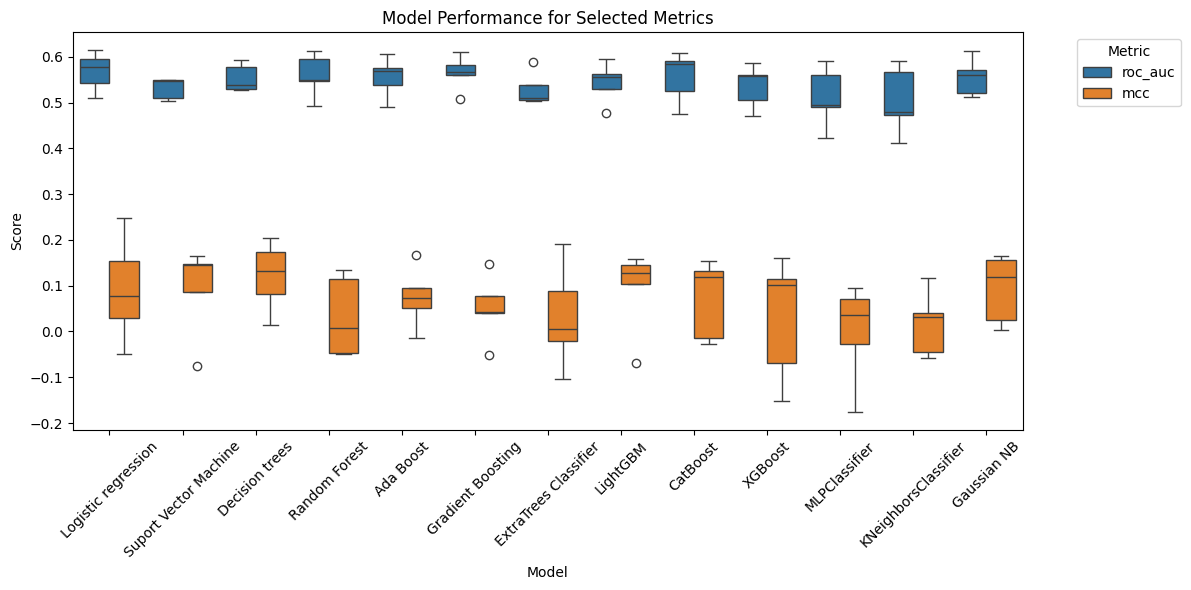

In [37]:
metrics_to_plot = ['mcc', 'roc_auc']  
df_filtered = fold_scores[fold_scores['Metric'].isin(metrics_to_plot)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Score', hue='Metric', data=df_filtered)
plt.xticks(rotation=45)
plt.title("Model Performance for Selected Metrics")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Handling for class imbalance

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [39]:
# define the catergorical columns
cat_features = ['sex', 'finalhiv',
            'fruit', 'veg', 'salt', 'beverage',
            'snacks', 'friedfood','smoking',
            'alcohol_consumption','vigorous physical activity',
       'moderate physical activity', 'walking']

#define the numerical columns
num_cols = ['bmi', 'ageyrs', 'artyrs','creatinine', 'triglycerides',
       'low-density lipoprotein', 'total cholesterol', 'high-density lipoprotein', 'eGFR_2021', 'waist_hip_ratio']

In [40]:
sampling_strategy = {0: 434, 1: 434}  

In [41]:
from imblearn.over_sampling import SMOTENC

# Initialize SMOTENC
smote_nc = SMOTENC(categorical_features=cat_features,
                   sampling_strategy=sampling_strategy,
                   random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

In [42]:
X_resampled.shape, y_resampled.shape

((868, 23), (868,))

In [43]:
# Perform cross-validation and get the results
results_df = cross_validate_metrics(models,X_resampled, y_resampled, cv=5, confidence=0.95)
print(results_df)

results_df.head(n=10)

Logistic regression
accuracy : 0.5898
precision : 0.5940
recall : 0.5806
f1 : 0.5864
roc_auc : 0.6301
mcc : 0.1798
specificity : 0.5987


Suport Vector Machine
accuracy : 0.6543
precision : 0.6746
recall : 0.6129
f1 : 0.6390
roc_auc : 0.7078
mcc : 0.3126
specificity : 0.6955


Decision trees
accuracy : 0.6370
precision : 0.6514
recall : 0.6106
f1 : 0.6250
roc_auc : 0.6313
mcc : 0.2992
specificity : 0.6727


Random Forest
accuracy : 0.7304
precision : 0.7238
recall : 0.7488
f1 : 0.7244
roc_auc : 0.7986
mcc : 0.4119
specificity : 0.7441


Ada Boost


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

accuracy : 0.6198


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

precision : 0.6303


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


recall : 0.5990


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

f1 : 0.6113


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

roc_auc : 0.6722


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


mcc : 0.2421


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

specificity : 0.6404


Gradient Boosting
accuracy : 0.6843
precision : 0.6839
recall : 0.6957
f1 : 0.6877
roc_auc : 0.7496
mcc : 0.3705
specificity : 0.6725


ExtraTrees Classifier
accuracy : 0.7039
precision : 0.6942
recall : 0.7027
f1 : 0.6891
roc_auc : 0.7735
mcc : 0.3632
specificity : 0.6796


LightGBM
[LightGBM] [Info] Number of positive: 347, number of negative: 347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1589
[LightGBM] [Info] Number of data points in the train set: 694, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

accuracy : 0.6532


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

precision : 0.6508


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

recall : 0.6750


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

f1 : 0.6582


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

roc_auc : 0.7226


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

mcc : 0.3116


/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

specificity : 0.6310


KNeighborsClassifier
accuracy : 0.6532
precision : 0.6772
recall : 0.5920
f1 : 0.6287
roc_auc : 0.7039
mcc : 0.3107
specificity : 0.7141


Gaussian NB
accuracy : 0.5645
precision : 0.6088
recall : 0.3549
f1 : 0.4466
roc_auc : 0.6254
mcc : 0.1415
specificity : 0.7742


                    model  accuracy_mean  accuracy_std  accuracy_ci_lower  \
0     Logistic regression       0.589911      0.037519           0.552369   
1   Suport Vector Machine       0.654280      0.026328           0.635067   
2          Decision trees       0.636667      0.029441           0.614298   
3           Random Forest       0.730695      0.025255           0.707806   
4               Ada Boost       0.619935      0.019544           0.604830   
5       Gradient Boosting       0.684793      0.029811           0.659644   
6   ExtraTrees Classifier       0.703305      0.019691           0.690087   
7                LightGBM       0.723305      0.008837           0.715919   
8              

,model,accuracy_mean,accuracy_std,accuracy_ci_lower,accuracy_ci_upper,precision_mean,precision_std,precision_ci_lower,precision_ci_upper,recall_mean,...,roc_auc_ci_lower,roc_auc_ci_upper,mcc_mean,mcc_std,mcc_ci_lower,mcc_ci_upper,specificity_mean,specificity_std,specificity_ci_lower,specificity_ci_upper
0,Logistic regression,0.589911,0.037519,0.552369,0.616796,0.594858,0.038651,0.554584,0.620513,0.580676,...,0.591122,0.653189,0.179605,0.075212,0.112882,0.233763,0.599971,0.073126,0.524967,0.641379
1,Suport Vector Machine,0.654280,0.026328,0.635067,0.678190,0.674783,0.047404,0.633989,0.715300,0.613469,...,0.683151,0.741888,0.312861,0.054475,0.266982,0.360492,0.694063,0.090801,0.610585,0.765517
2,Decision trees,0.636667,0.029441,0.614298,0.663916,0.651193,0.039593,0.618228,0.686344,0.609596,...,0.605039,0.654729,0.299386,0.050441,0.259613,0.342285,0.672551,0.061437,0.618925,0.726437
3,Random Forest,0.730695,0.025255,0.707806,0.751724,0.723645,0.034897,0.694266,0.754566,0.747389,...,0.760605,0.829387,0.411052,0.062419,0.361676,0.472352,0.742903,0.055995,0.696605,0.790805
4,Ada Boost,0.619935,0.019544,0.604830,0.638649,0.630054,0.041281,0.600544,0.671198,0.598085,...,0.655631,0.684380,0.242819,0.042649,0.210331,0.282742,0.641903,0.082720,0.575087,0.711854
5,Gradient Boosting,0.684793,0.029811,0.659644,0.706897,0.683307,0.039019,0.645284,0.711711,0.695268,...,0.726116,0.767018,0.369749,0.058288,0.312452,0.414930,0.673596,0.079534,0.592114,0.733333
6,ExtraTrees Classifier,0.703305,0.019691,0.690087,0.723440,0.694356,0.012855,0.685666,0.706862,0.703016,...,0.754566,0.792496,0.362608,0.061506,0.310701,0.413700,0.679670,0.037497,0.651216,0.714114
7,LightGBM,0.723305,0.008837,0.715919,0.731034,0.725808,0.037999,0.696874,0.763975,0.728891,...,0.789693,0.827058,0.450048,0.019509,0.433998,0.466475,0.718842,0.067994,0.661802,0.786207
8,CatBoost,0.718102,0.025385,0.694612,0.738768,0.720223,0.024072,0.698820,0.741118,0.712077,...,0.769022,0.818021,0.437547,0.050646,0.392363,0.476903,0.721025,0.043297,0.682652,0.760920
9,XGBoost,0.730583,0.020335,0.713614,0.749130,0.734747,0.040982,0.703737,0.774074,0.727628,...,0.769390,0.815053,0.463863,0.041794,0.429396,0.504030,0.730482,0.065757,0.678856,0.787704


In [44]:
#### Format the table to include the mean(upper,lower CI)

metrics = ["accuracy", "precision", "recall", "f1", "mcc", "specificity", "roc_auc"]

formatted_df = pd.DataFrame()
formatted_df["model"] = results_df["model"]

for metric in metrics:
    mean_col = f"{metric}_mean"
    lower_col = f"{metric}_ci_lower"
    upper_col = f"{metric}_ci_upper"

    
    formatted_df[metric] = results_df.apply(
        lambda row: f"{row[mean_col]:.3f} ({row[lower_col]:.3f}, {row[upper_col]:.3f})"
                    if not np.isnan(row[mean_col]) else "NaN",
        axis=1
    )

print(formatted_df.to_string(index=False))

                model             accuracy            precision               recall                   f1                  mcc          specificity              roc_auc
  Logistic regression 0.590 (0.552, 0.617) 0.595 (0.555, 0.621) 0.581 (0.552, 0.605) 0.586 (0.562, 0.608) 0.180 (0.113, 0.234) 0.600 (0.525, 0.641) 0.630 (0.591, 0.653)
Suport Vector Machine 0.654 (0.635, 0.678) 0.675 (0.634, 0.715) 0.613 (0.568, 0.663) 0.639 (0.622, 0.658) 0.313 (0.267, 0.360) 0.694 (0.611, 0.766) 0.708 (0.683, 0.742)
       Decision trees 0.637 (0.614, 0.664) 0.651 (0.618, 0.686) 0.610 (0.555, 0.659) 0.625 (0.603, 0.648) 0.299 (0.260, 0.342) 0.673 (0.619, 0.726) 0.631 (0.605, 0.655)
        Random Forest 0.731 (0.708, 0.752) 0.724 (0.694, 0.755) 0.747 (0.714, 0.779) 0.723 (0.693, 0.751) 0.411 (0.362, 0.472) 0.743 (0.697, 0.791) 0.798 (0.761, 0.829)
            Ada Boost 0.620 (0.605, 0.639) 0.630 (0.601, 0.671) 0.598 (0.560, 0.639) 0.611 (0.606, 0.619) 0.243 (0.210, 0.283) 0.642 (0.575, 0.712) 0.673 (

In [45]:
formatted_df.to_csv("/Users/kassywang/Documents/Summer Project/R/without outliers/cross_val_results_grouped_binary_outcome_after_resampling.csv", index=False)


#### **Model selection and Hyper parameter tuning**